# Force Error Project
I currently have a model for the potential at a point on the edge of a sphere, and I don't think it will be too complicated to model the potential at any point in the sphere.

#### For a number of Monte Carlo samples of $n$ particles, in a sphere with radius $r$ and density $\rho$, the average potential $\phi$ at a point $r$ from the center can be modeled by:

<center> $\phi = \frac{-r^5}{a*\frac{n}{\rho^2}},$ where $a$ is a constant with value $1.5\times10^{10}$ </center>

#### The RMS error $\phi_{rms}$ for these samples can be modeled by:

$$\phi_{rms}= \frac{-r^5}{(a*\frac{(n-1)^2}{\rho^2})+(b*\frac{(n-1)}{\rho^2})},$$ <center>where $a$ is a constant with value $2.5\times10^{9}$ and $b$ is a constant with value $1\times10^{11}$</center>

In [4]:
from calculations import *
from model import *
import matplotlib.pyplot as plt
from useful_plots import *

plt.rcParams['figure.figsize'] = [8, 8]

## Generating Sample of Particles
In order to sample particles evenly throughout the sphere, I used the sampling rule from [this answer](https://stackoverflow.com/questions/5408276/sampling-uniformly-distributed-random-points-inside-a-spherical-volume). 

We can plot the particles generated to see that they are distributed evenly (smaller point means further away):

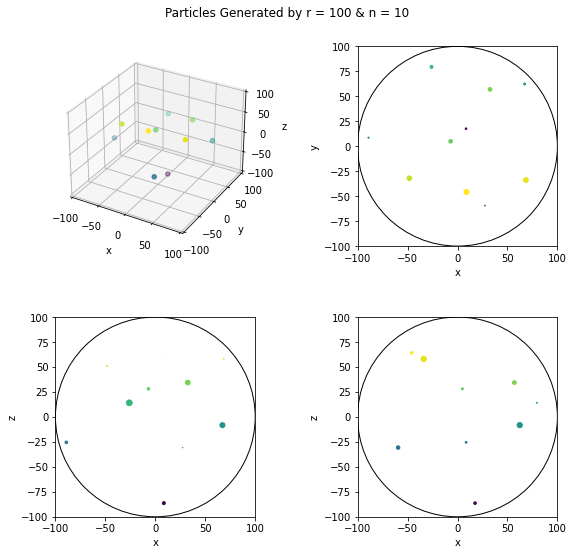

In [5]:
plot_particles(100,10)

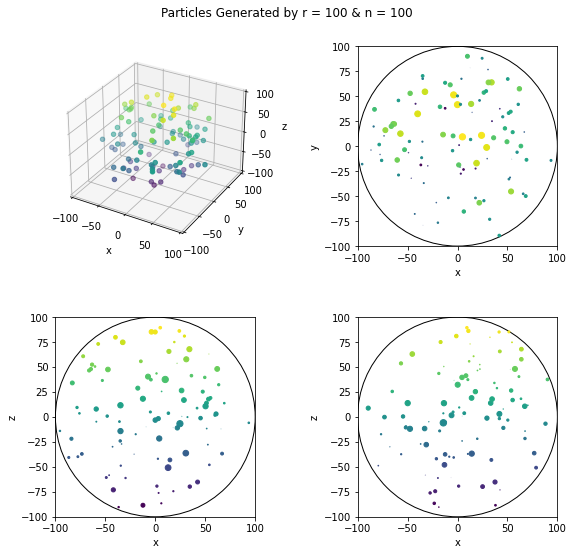

In [6]:
plot_particles(100,100)

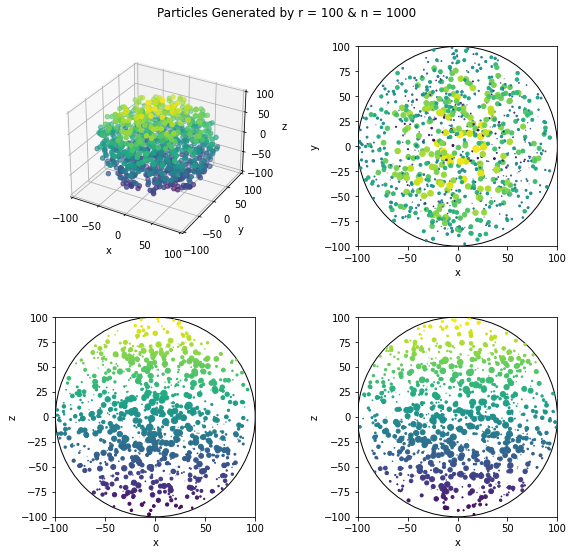

In [7]:
plot_particles(100,1000)

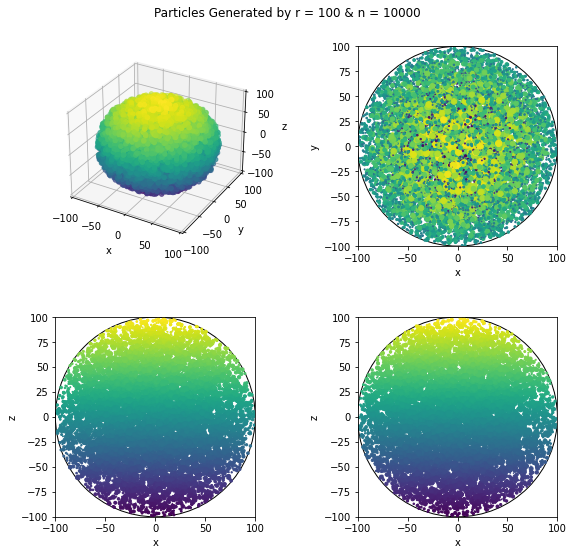

In [9]:
plot_particles(100,10000)

## Calculating Gravitational Potential from Sample
Given we have density $\rho$, radius $r$ and number of particles $n$, the mass $m$ of each particle is
$$m=\frac{\rho*r^3}{n}$$

### Calculating the Gravitational Potential of Sample at a Point $r$ from the Center
Given density `density`, radius `radius` and number of particles `n_particles`, I calculate and store the mass of the particles thus:

```
mass_particles = (density * (radius ** 3))/n_particles
```

Using `spatial` from `scipy`, I calculate the distances from each particle (stored as a 1x3 numpy array of x,y,z coordinates within array `particles`) and the point $(r,0,0)$ (stored in `start_point` as a 1x1x3 numpy array of x,y,z coordinates) thus:

```
d = spatial.distance.cdist(particles,start_point)
```

Using `constants` from `scipy`, I can thus calculate and sum the potentials thus:

```
np.sum(-constants.G * (mass_particles**2)/d)
```

### Calculating the Theoretical Gravitational Potential at a Point $r$ from the Center
Given density `density`, radius `radius` and number of particles `n_particles`, I calculate the theoretical gravitational potential thus:

```
(-4/3) * math.pi * constants.G * density * (radius ** 2)
```

## Plots

In [ ]:
plot_radius_potential(100,10,repeats=1)

In [ ]:
plot_n_potential(100,100,upper_limit=3000)

In [ ]:
plot_n_potential(100,10,upper_limit=3000)

In [ ]:
plot_n_potential(1000,10,upper_limit=3000)

In [ ]:
plot_calculated_modeled_diff_n_potential(100,100,upper_limit=500,repeats=10)

In [ ]:
plot_calculated_modeled_diff_n_potential(100,100,upper_limit=500,repeats=20)

In [ ]:
plot_calculated_modeled_diff_n_potential(100,100,upper_limit=500,repeats=1000)